# TUTORIAL - CONSTRUCT A STRUCTURAL CONNECTIVITY OF THE ALLEN MOUSE BRAIN
### By Giovanni Rabuffo - giovanni.rabuffo@univ-amu.fr
### Based on the work of Francesca Melozzi et al - The Virtual Mouse Brain open source data DOI: https://doi.org/10.1523/ENEURO.0111-17.2017 

### Install allensdk! (Check README)

In [1]:
%pylab nbagg
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.io as io
import nibabel as nib
import copy
import pandas as pd
import pickle
import functions as fun

## IMPORT data

### MouseConnectivityCache...

In [3]:
# we set the data resolution to 100 microns**3
mcc=fun.mcc(resolution=100)

### Structure_tree to get info on some structures...

In [4]:
structure_tree = mcc.get_structure_tree()

### Annotation volumes and template

In [5]:
# download from the AllenSDK the annotation volume, the template volume
vol, annot_info = mcc.get_annotation_volume()
template, template_info = mcc.get_template_volume()

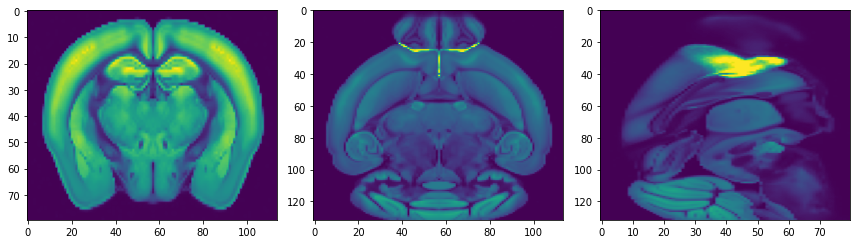

In [6]:
depth=2.
plt.figure(figsize=(12,3.5))
slice_idx=int(np.shape(template)[0]/depth);slice_idy=int(np.shape(template)[1]/depth);slice_idz=int(np.shape(template)[2]/depth)
plt.subplot(131);plt.imshow(template[slice_idx,:,:],aspect='auto',cmap='viridis')
plt.subplot(132);plt.imshow(template[:,slice_idy,:],aspect='auto',cmap='viridis')
plt.subplot(133);plt.imshow(template[:,:,slice_idz],aspect='auto',cmap='viridis')
plt.tight_layout()
plt.show()

### Define Maps from acronyms to ids

In [7]:
ia_map = structure_tree.get_id_acronym_map()
ai_map = {item:key for key, item in ia_map.items()}

# Define your favorite regions of interest (ROIs)
## Valuable resources for importing and visualizing regions from the Allen Mouse Atlas: 
### -->  https://allensdk.readthedocs.io/en/latest/_static/examples/nb/mouse_connectivity.html
### -->  https://atlas.brain-map.org/atlas
### -->  https://scalablebrainatlas.incf.org/mouse/ABA_v3

In [8]:
# List of acronyms corresponding to a selected set of regions of the Allen Mouse Brain
ROIs = np.array(['FRP', 'MOp', 'MOs', 'SSp-n', 'SSp-bfd', 'SSp-ll', 'SSp-m', 'SSp-ul', 'SSp-tr',
 'SSp-un', 'SSs', 'AUDd', 'AUDp', 'AUDpo', 'AUDv', 'VISal', 'VISam', 'VISl', 'VISp',
 'VISpl', 'VISpm', 'VISli', 'VISpor', 'ACAd', 'PL', 'RSPagl', 'RSPd', 'RSPv',
 'VISa', 'VISrl', 'TEa', 'MOB'], dtype=str)

In [9]:
ROIs_id=[]
for i in ROIs:
    ROIs_id.append(ia_map[i])

In [10]:
structures = structure_tree.get_structures_by_acronym(list(ROIs))
pd.DataFrame(structures)

,acronym,graph_id,graph_order,id,name,structure_id_path,structure_set_ids,rgb_triplet
0,FRP,1,6,184,"Frontal pole, cerebral cortex","[997, 8, 567, 688, 695, 315, 184]","[3, 112905828, 688152357, 691663206, 687527945...","[38, 143, 69]"
1,MOp,1,18,985,Primary motor area,"[997, 8, 567, 688, 695, 315, 500, 985]","[112905828, 688152357, 691663206, 687527945, 1...","[31, 157, 90]"
2,MOs,1,24,993,Secondary motor area,"[997, 8, 567, 688, 695, 315, 500, 993]","[112905828, 688152357, 691663206, 687527945, 1...","[31, 157, 90]"
3,SSp-n,1,44,353,"Primary somatosensory area, nose","[997, 8, 567, 688, 695, 315, 453, 322, 353]","[112905828, 688152357, 691663206, 687527945, 1...","[24, 128, 100]"
4,SSp-bfd,1,51,329,"Primary somatosensory area, barrel field","[997, 8, 567, 688, 695, 315, 453, 322, 329]","[112905828, 688152357, 691663206, 687527945, 1...","[24, 128, 100]"
5,SSp-ll,1,65,337,"Primary somatosensory area, lower limb","[997, 8, 567, 688, 695, 315, 453, 322, 337]","[112905828, 688152357, 691663206, 687527945, 1...","[24, 128, 100]"
6,SSp-m,1,72,345,"Primary somatosensory area, mouth","[997, 8, 567, 688, 695, 315, 453, 322, 345]","[112905828, 688152357, 691663206, 687527945, 1...","[24, 128, 100]"
7,SSp-ul,1,79,369,"Primary somatosensory area, upper limb","[997, 8, 567, 688, 695, 315, 453, 322, 369]","[112905828, 688152357, 691663206, 687527945, 1...","[24, 128, 100]"
8,SSp-tr,1,86,361,"Primary somatosensory area, trunk","[997, 8, 567, 688, 695, 315, 453, 322, 361]","[112905828, 688152357, 691663206, 687527945, 1...","[24, 128, 100]"
9,SSp-un,1,93,182305689,"Primary somatosensory area, unassigned","[997, 8, 567, 688, 695, 315, 453, 322, 182305689]","[112905828, 688152357, 691663206, 687527945, 1...","[24, 128, 100]"


### Select experiments

In [11]:
# the function 'dictionary_builder' creates a dictionary with information about which experiments need to be downloaded
ist2e = fun.dictionary_builder(mcc,structure_tree,ROIs,False)
# sort by ids
ist2e = {your_key: ist2e[your_key] for your_key in ROIs_id}

### Construct the projection matrices for all the regions
### Note: the download step requires some time. Save the projmaps for faster use later!

In [12]:
# The function 'download_an_construct_matrix' downloads experiments necessary to build the connectivity and returns the projection maps
projmaps = fun.download_an_construct_matrix(mcc,1, ist2e, False)

injection site id 184  has  5  experiments with pm shape  (5, 96)
injection site id 985  has  16  experiments with pm shape  (16, 96)
injection site id 993  has  21  experiments with pm shape  (21, 96)
injection site id 353  has  7  experiments with pm shape  (7, 96)
injection site id 329  has  10  experiments with pm shape  (10, 96)
injection site id 337  has  8  experiments with pm shape  (8, 96)
injection site id 345  has  9  experiments with pm shape  (9, 96)
injection site id 369  has  9  experiments with pm shape  (9, 96)
injection site id 361  has  6  experiments with pm shape  (6, 96)
injection site id 182305689  has  5  experiments with pm shape  (5, 96)
injection site id 378  has  10  experiments with pm shape  (10, 96)
injection site id 1011  has  2  experiments with pm shape  (2, 96)
injection site id 1002  has  4  experiments with pm shape  (4, 96)
injection site id 1027  has  2  experiments with pm shape  (2, 96)
injection site id 1018  has  2  experiments with pm shape  

KeyboardInterrupt: 

Exception ignored in: 'pandas._libs.lib.c_is_list_like'
Traceback (most recent call last):
  File "/Users/giovanni/anaconda2/envs/p36workshop/lib/python3.6/abc.py", line 180, in __instancecheck__
    def __instancecheck__(cls, instance):
KeyboardInterrupt


injection site id 533  has  7  experiments with pm shape  (7, 96)
injection site id 312782574  has  2  experiments with pm shape  (2, 96)
injection site id 312782628  has  8  experiments with pm shape  (8, 96)
injection site id 39  has  9  experiments with pm shape  (9, 96)
injection site id 972  has  5  experiments with pm shape  (5, 96)
injection site id 894  has  6  experiments with pm shape  (6, 96)
injection site id 879  has  13  experiments with pm shape  (13, 96)
injection site id 886  has  20  experiments with pm shape  (20, 96)
injection site id 312782546  has  1  experiments with pm shape  (1, 96)
injection site id 417  has  2  experiments with pm shape  (2, 96)
injection site id 541  has  2  experiments with pm shape  (2, 96)
injection site id 507  has  6  experiments with pm shape  (6, 96)
Experiment id 180403712 , the total injection density is  0.24144494798448352
Experiment id 146078721 , the total injection density is  0.37443698774295475
Experiment id 158375425 , the t

In [13]:
# Save a dictionary into a pickle file.
pickle.dump(projmaps, open('projmaps.p', "wb" ) )
# load projmaps
projmaps = pickle.load(open('projmaps.p', "rb" ) )

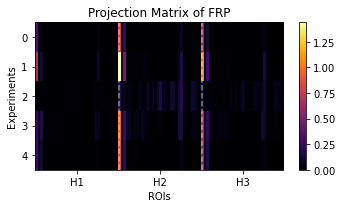

In [14]:
plt.figure(figsize=(5,3))
plt.title('Projection Matrix of FRP')
plt.imshow(projmaps[ia_map['FRP']]['matrix'],aspect='auto',interpolation='none',cmap='inferno')
plt.axvline(len(ROIs),c='white',linestyle='--',alpha=0.5);plt.axvline(2*len(ROIs),c='white',linestyle='--',alpha=0.5)
plt.xticks([int(len(ROIs)/2),int(len(ROIs)+len(ROIs)/2),int(2*len(ROIs)+len(ROIs)/2)],['H1','H2','H3'])
plt.ylabel('Experiments');plt.xlabel('ROIs');plt.colorbar()
plt.tight_layout()
plt.show()

### Processing and cleaning of the projmaps

In [15]:
# the function 'pms_cleaner' cleans the file projmaps in 2 steps
# 1) Set all the target sites to be the same for all the injection sites
# 2) Remove Nan
projmaps = fun.pms_cleaner(projmaps)

In total 0 injection sites have been removed after imposing that targets and injection sites are the same. New number of keys in projmaps is N=32
In total 0 injection sites have been removed after imposing that there is no Nan. New number of keys in projmaps is N=32


In [16]:
# the function 'areas_volume_threshold' remove  areas smaller than a threshold resolution
# Select only the areas that have a volume greater than (micron^3): default: '1000000000'}]
resolution=1000
vol_thresh=1000000000

projmaps=fun.areas_volume_threshold(mcc, projmaps, vol_thresh, resolution)

2022-06-08 12:25:51,208 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_184.nrrd
2022-06-08 12:25:51,612 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_985.nrrd
2022-06-08 12:25:51,952 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_993.nrrd
2022-06-08 12:25:52,296 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_353.nrrd
2022-06-08 1

Regions removed because too small
[]
Big regions left
[184, 985, 993, 353, 329, 337, 345, 369, 361, 182305689, 378, 1011, 1002, 1027, 1018, 402, 394, 409, 385, 425, 533, 312782574, 312782628, 39, 972, 894, 879, 886, 312782546, 417, 541, 507]


In [18]:
projmaps=fun.areas_volume_threshold(mcc, projmaps, vol_thresh, resolution)

Regions removed because too small
[]
Big regions left
[184, 985, 993, 353, 329, 337, 345, 369, 361, 182305689, 378, 1011, 1002, 1027, 1018, 402, 394, 409, 385, 425, 533, 312782574, 312782628, 39, 972, 894, 879, 886, 312782546, 417, 541, 507]


### Organize labels and create parcellation of the Allen Atlas according to the ROIs

In [19]:
# the function 'create_file_order' creates file order and keyword that will be the link between the SC order and the
# id key in the Allen database
[order, key_ord] = fun.create_file_order(projmaps, structure_tree)

# order has graph_order as keys and (target_id ,acronyms, region labels) as values
labels=np.asarray(list(order.values()))[:,1]
regions=np.asarray(list(order.values()))[:,2]

In [20]:
# 'mouse_brain_visualizer' returns a volume indexed between 0 and N-1, with N=tot brain areas in the parcellation.
# -1=background and areas that are not in the parcellation
vol_parcel = fun.mouse_brain_visualizer(vol, order, key_ord, structure_tree, projmaps)

In [21]:
vol_parcel.shape

(114, 132, 80)

In [22]:
# Select superficial voxels
surface_voxels=-10*np.ones((np.shape(vol_parcel)[0],np.shape(vol_parcel)[1])) 
for i in range(np.shape(vol_parcel)[0]):
    for j in range(np.shape(vol_parcel)[1]):
        if len(np.where(vol_parcel[i,j,:]!=-1)[0])>0:
            surface_voxels[i,j]=vol_parcel[i,j,:][np.where(vol_parcel[i,j,:]!=-1)[0][-1]]

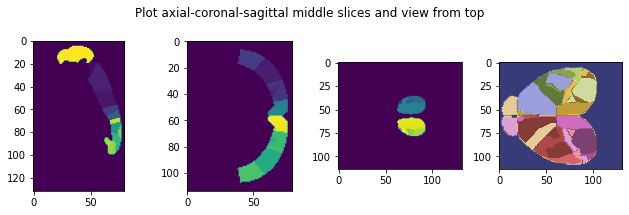

In [23]:
plt.figure(figsize=(9,3))
plt.suptitle('Plot axial-coronal-sagittal middle slices and view from top')
depth=2.
slice_idx=int(np.shape(vol_parcel)[0]/2.6);slice_idy=int(np.shape(vol_parcel)[1]/2.);slice_idz=int(np.shape(vol_parcel)[2]/depth)
plt.subplot(141);plt.imshow(np.where(vol_parcel==23,200,vol_parcel)[slice_idx,:,:])
plt.subplot(142);plt.imshow(np.where(vol_parcel==23,200,vol_parcel)[:,slice_idy,:])
plt.subplot(143);plt.imshow(np.where(vol_parcel==23,200,vol_parcel)[:,:,75])
plt.subplot(144);plt.imshow(surface_voxels,cmap='tab20b')
plt.tight_layout()
plt.show()

### Construct the Structural Connectivity and the tract lengths

In [25]:
# 'construct_structural_conn' builds the Structural Connectivity (SC) matrix
structural_conn = fun.construct_structural_conn(projmaps, order, key_ord)

# 'construct_centres' returns the coordinate of the centres and the name of the brain areas in the selected parcellation
[centres, names, acronyms] = fun.construct_centres(mcc, order, key_ord)

# 'construct_tract_lengths' returns the tract lengths between the brain areas in the selected parcellation
tract_lengths = fun.construct_tract_lengths(centres)

# Volume Sizes
Vol_size=np.unique(vol_parcel,return_counts=True)[1][1:]

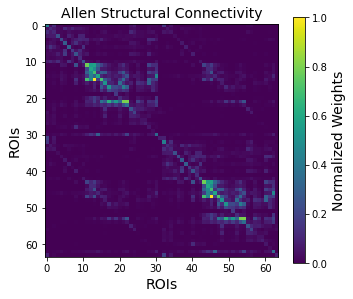

In [40]:
plt.figure(figsize=(5,5))
plt.title('Allen Structural Connectivity',fontsize=14)
plt.imshow(structural_conn,interpolation='nearest',cmap='viridis')
plt.xlabel('ROIs',fontsize=14);plt.ylabel('ROIs',fontsize=14)
cbar=plt.colorbar(shrink=0.75)
cbar.set_label(label='Normalized Weights',size=14)
plt.tight_layout()
plt.show()

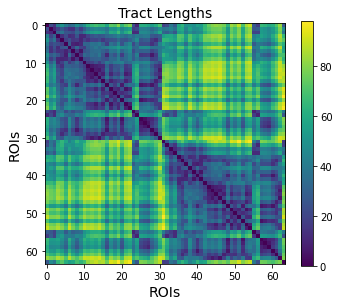

In [41]:
plt.figure(figsize=(5,5))
plt.title('Tract Lengths',fontsize=14)
plt.imshow(tract_lengths,interpolation='nearest',cmap='viridis')
plt.xlabel('ROIs',fontsize=14);plt.ylabel('ROIs',fontsize=14)
plt.colorbar(shrink=0.75)
plt.tight_layout()
plt.show()

In [28]:
# ordered ROIs names
names

['Right Frontal pole, cerebral cortex',
 'Right Primary motor area',
 'Right Secondary motor area',
 'Right Primary somatosensory area, nose',
 'Right Primary somatosensory area, barrel field',
 'Right Primary somatosensory area, lower limb',
 'Right Primary somatosensory area, mouth',
 'Right Primary somatosensory area, upper limb',
 'Right Primary somatosensory area, trunk',
 'Right Primary somatosensory area, unassigned',
 'Right Supplemental somatosensory area',
 'Right Dorsal auditory area',
 'Right Primary auditory area',
 'Right Posterior auditory area',
 'Right Ventral auditory area',
 'Right Anterolateral visual area',
 'Right Anteromedial visual area',
 'Right Lateral visual area',
 'Right Primary visual area',
 'Right Posterolateral visual area',
 'Right posteromedial visual area',
 'Right Laterointermediate area',
 'Right Postrhinal area',
 'Right Anterior cingulate area, dorsal part',
 'Right Prelimbic area',
 'Right Retrosplenial area, lateral agranular part',
 'Right Ret